#  拟合曲线

In [369]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from collections import Counter
from math import log
from math import e

In [371]:
data = pd.read_csv('C:\\Users\\Mr.Wang\\zhihudata\\tongji.csv')

In [404]:
data = data.fillna(value=0)
data = data.sort_values(["following_count"],ascending=True)

In [406]:
following_count = pd.to_numeric(data.following_count)  # 类型转换
cfollowing = Counter()   # 使用Counter类进行统计
# print(following_count)
for item in following_count:
    cfollowing[item] += 1
#print(cfollowing)

In [408]:
# Counter.most_common(cfollowing,10)  # 输出前十个结果

## 将Counter字典类型转化为DataFrame类型

In [449]:
df = pd.DataFrame.from_dict(cfollowing, orient='index').reset_index()
df.columns = ['key', 'cnts']
df.to_csv("Gehpi.csv")
df.head()

,key,cnts
0,0.0,3540
1,1.0,5860
2,2.0,4470
3,3.0,3954
4,4.0,3374


In [412]:
df = np.log(df+1.5)
df.head()

,key,cnts
0,0.644726,2.269267
1,0.882234,2.320048
2,1.012605,2.293088
3,1.099970,2.280632
4,1.164633,2.264291


In [414]:
#df.plot.scatter(x='key',y='cnts',color='DarkBlue')

##  方法一：
[微博地址](https://blog.csdn.net/kk185800961/article/details/79220724)

In [418]:
import statsmodels.formula.api as smf 
from mpl_toolkits.mplot3d import Axes3D

X = df['key'] 
y = df['cnts']

                            OLS Regression Results                            
Dep. Variable:                   cnts   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                 1.191e+04
Date:                Sat, 12 May 2018   Prob (F-statistic):               0.00
Time:                        17:14:54   Log-Likelihood:                 1310.4
No. Observations:                2917   AIC:                            -2617.
Df Residuals:                    2915   BIC:                            -2605.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7043      0.041    138.029      0.0

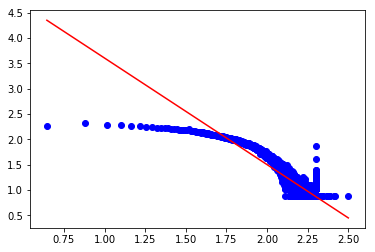

In [423]:
est = smf.ols(formula='cnts ~ key', data=df).fit()  
y_pred = est.predict(X)  
print(est.summary())    
fig = plt.figure()  
ax = fig.add_subplot(111)  
ax.scatter(X, y, c='b')  
ax.plot(X, y_pred, c='r')  
plt.show() 

## 方法二：
[博客地址](https://blog.csdn.net/qq_17119267/article/details/79108333)

In [427]:
x = df['key'].values
X = sm.add_constant(x)
y = df['cnts'].values


In [428]:
results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     5967.
Date:                Sat, 12 May 2018   Prob (F-statistic):               0.00
Time:                        17:15:07   Log-Likelihood:                 4792.9
No. Observations:                2917   AIC:                            -9582.
Df Residuals:                    2915   BIC:                            -9570.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6261      0.027     98.739      0.0

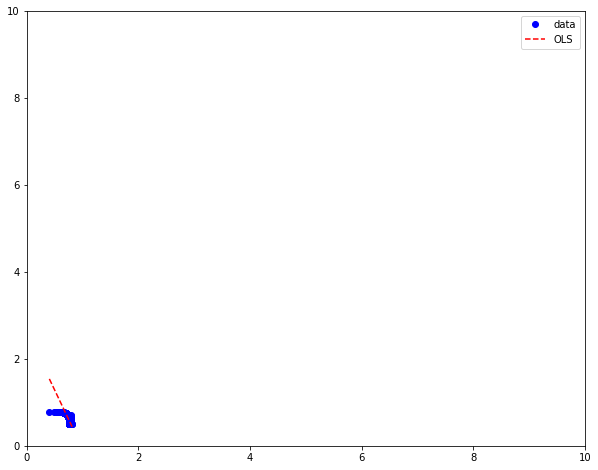

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     5967.
Date:                Sat, 12 May 2018   Prob (F-statistic):               0.00
Time:                        17:15:17   Log-Likelihood:                 4792.9
No. Observations:                2917   AIC:                            -9582.
Df Residuals:                    2915   BIC:                            -9570.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6261      0.027     98.739      0.0

In [431]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(x, y, 'bo', label="data")
ax.plot(x, results.fittedvalues, 'r--', label="OLS")
ax.legend(loc='best')
ax.axis((0, 10, 0, 10))
plt.show()
results = sm.OLS(y, X).fit()
print(results.summary())


# 完整代码

In [432]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from collections import Counter
from math import log
from math import e



data = pd.read_csv('C:\\Users\\Mr.Wang\\zhihudata\\tongji.csv')
data = data.fillna(value=0)

data = data.sort_values(["following_count"],ascending=True)

following_count = pd.to_numeric(data.following_count)  # 类型转换
cfollowing = Counter()   # 使用Counter类进行统计
# print(following_count)
for item in following_count:
    cfollowing[item] += 1
#print(cfollowing)

df = np.log(df+10)
df.head()





,key,cnts
0,2.342176,2.377824
1,2.350431,2.378476
2,2.354256,2.378132
3,2.356599,2.377971
4,2.358233,2.377759


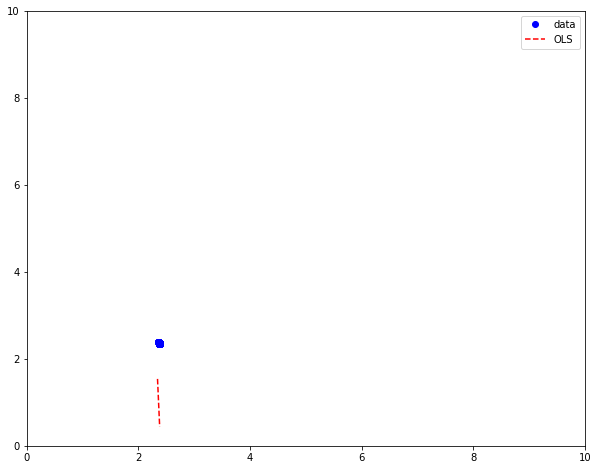

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     5831.
Date:                Sat, 12 May 2018   Prob (F-statistic):               0.00
Time:                        17:15:18   Log-Likelihood:                 11657.
No. Observations:                2917   AIC:                        -2.331e+04
Df Residuals:                    2915   BIC:                        -2.330e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.8040      0.084    104.295      0.0

In [433]:
x = df['key'].values
X = sm.add_constant(x)
y = df['cnts'].values
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(x, y, 'bo', label="data")
ax.plot(x, results.fittedvalues, 'r--', label="OLS")
ax.legend(loc='best')
ax.axis((0, 10, 0, 10))
plt.show()
results = sm.OLS(y, X).fit()
print(results.summary())

## 清晰的讲解
[博客地址](https://www.joinquant.com/post/1786?f=study&m=python)

        key      cnts
2  1.551445  8.405752
3  1.743668  8.283170
4  1.904832  8.124660
5  2.043592  8.031619
6  2.165422  7.933337
                            OLS Regression Results                            
Dep. Variable:                   cnts   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 1.080e+04
Date:                Sat, 12 May 2018   Prob (F-statistic):          2.26e-173
Time:                        17:35:58   Log-Likelihood:                 153.39
No. Observations:                 198   AIC:                            -302.8
Df Residuals:                     196   BIC:                            -296.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]

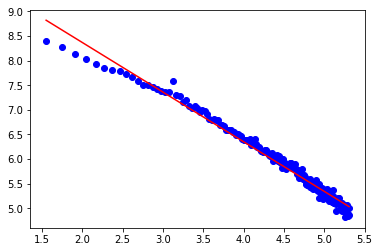

In [448]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import statsmodels.formula.api as smf
from math import log
from math import e
data = pd.read_csv('C:\\Users\\Mr.Wang\\zhihudata\\tongji.csv')
data = data.fillna(value=0)
data = data.sort_values(["following_count"],ascending=True)

following_count = pd.to_numeric(data.following_count)  # 类型转换


cfollowing = Counter()   # 使用Counter类进行统计
# print(following_count)
for item in following_count:
    cfollowing[item] += 1
#print(cfollowing)

df = pd.DataFrame.from_dict(cfollowing, orient='index').reset_index()
df.columns = ['key', 'cnts']
df = df.loc[df['key']< 200] 
df = df.loc[df['key']> 1]

df = np.log(df+e)
print(df.head())
X = df['key']
y = df['cnts']
est = smf.ols(formula='cnts ~ key', data=df).fit()
y_pred = est.predict(X)
print(est.summary())
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X, y, c='b')
ax.plot(X, y_pred, c='r')
plt.show()